<a href="https://colab.research.google.com/github/AnanyaJain3/Occluded_Facial_Realtime_Detection/blob/main/python%20files/MTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Mount drive
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('./drive/My Drive/Facial_detection/')

Mounted at /content/drive


In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=c4e88feaa54627d8654a83788c17ff57f5b841b118d0d95a397ae3b6856537c3
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
pwd

'/content/drive/MyDrive/Facial_detection'

I found 3 face(s) in this photograph.
A face is located at pixel location Top: 73, Left: 128, Bottom: 135, Right: 190
A face is located at pixel location Top: 78, Left: 199, Bottom: 130, Right: 250
A face is located at pixel location Top: 59, Left: 66, Bottom: 122, Right: 128
The chin in this face has the following points: [(141, 89), (140, 95), (139, 101), (139, 108), (140, 115), (141, 123), (144, 129), (148, 135), (155, 137), (163, 137), (172, 134), (179, 130), (185, 124), (189, 117), (192, 110), (193, 103), (195, 95)]
The left_eyebrow in this face has the following points: [(142, 86), (144, 84), (148, 85), (152, 87), (156, 89)]
The right_eyebrow in this face has the following points: [(162, 90), (168, 89), (174, 88), (180, 90), (184, 93)]
The nose_bridge in this face has the following points: [(158, 92), (157, 97), (155, 102), (154, 107)]
The nose_tip in this face has the following points: [(150, 109), (152, 110), (155, 112), (158, 111), (162, 110)]
The left_eye in this face has the

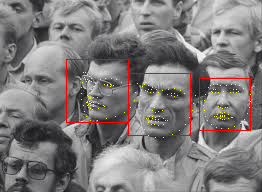

In [ ]:
import PIL.Image
import PIL.ImageDraw
import face_recognition

image = face_recognition.load_image_file("./images-2.jpeg")

# Find all the faces in the image
face_locations = face_recognition.face_locations(image)
# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)


number_of_faces = len(face_locations)
print("I found {} face(s) in this photograph.".format(number_of_faces))

# Load the image into a Python Image Library object so that we can draw on top of it and display it
pil_image = PIL.Image.fromarray(image)

# Create a PIL drawing object to be able to draw lines later
draw = PIL.ImageDraw.Draw(pil_image)

for face_location in face_locations:

    # Print the location of each face in this image. Each face is a list of co-ordinates in (top, right, bottom, left) order.
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # Let's draw a box around the face
    draw = PIL.ImageDraw.Draw(pil_image)
    draw.rectangle([left, top, right, bottom], outline="red")

# Display the image on screen
#pil_image.show() # if running in local machine
pil_image # if running in colab


# Loop over each face
for face_landmarks in face_landmarks_list:

    # Loop over each facial feature (eye, nose, mouth, lips, etc)
    for name, list_of_points in face_landmarks.items():

        # Print the location of each facial feature in this image
        print("The {} in this face has the following points: {}".format(name, list_of_points))
        draw.point(list_of_points,fill=(255, 255, 0))

        # Let's trace out each facial feature in the image with a line!
        #draw.line(list_of_points, fill="red", width=2)

#pil_image.show()
pil_image

In [ ]:

import warnings
warnings.filterwarnings('ignore')



In [ ]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 35.7 MB/s eta 0:00:00


In [ ]:
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # opencv
import tensorflow as tf
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image

In [ ]:
import os

[[[177 177 177]
  [172 172 172]
  [167 167 167]
  ...
  [104 104 104]
  [105 105 105]
  [110 110 110]]

 [[159 159 159]
  [159 159 159]
  [155 155 155]
  ...
  [126 126 126]
  [127 127 127]
  [114 114 114]]

 [[151 151 151]
  [156 156 156]
  [150 150 150]
  ...
  [155 155 155]
  [156 156 156]
  [125 125 125]]

 ...

 [[ 67  67  67]
  [ 78  78  78]
  [ 64  64  64]
  ...
  [ 64  62  62]
  [ 57  55  55]
  [ 47  45  45]]

 [[ 67  67  67]
  [ 90  90  90]
  [ 76  76  76]
  ...
  [ 58  56  56]
  [ 53  51  51]
  [ 44  42  42]]

 [[ 75  75  75]
  [101 101 101]
  [ 87  87  87]
  ...
  [ 54  52  52]
  [ 50  48  48]
  [ 41  39  39]]]


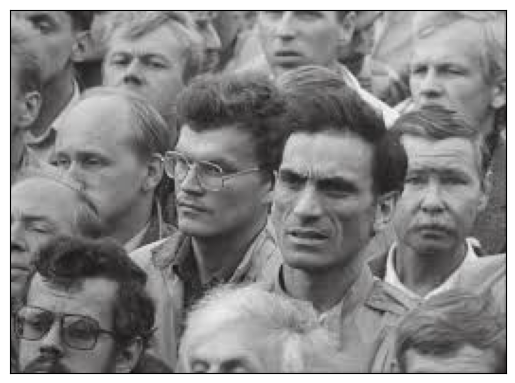

(192, 262, 3)


In [ ]:


img = cv2.imread('images-2.jpeg')
print(img)
plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
print(img.shape)

In [ ]:
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

1/1 [==============================] - 0s 267ms/step


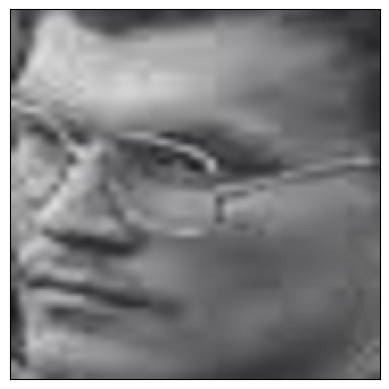

(192, 262, 3)


In [ ]:
# load the photo and extract the face
pixels = extract_face('images-2.jpeg')
plt.imshow(pixels)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
print(img.shape)


In [ ]:
pwd


'/content'

In [ ]:
import os
import cv2
import numpy as np

# Mount drive
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('./drive/My Drive/Facial_detection/')

def load_face(dir):
    faces = list()
    for filename in os.listdir(dir):
        path = os.path.join(dir, filename)
        if os.path.isfile(path) and path.lower().endswith(('.jpg', '.jpeg', '.png')):
            image = cv2.imread(path)
            if image is not None:
                faces.append(image)
    return faces

def load_dataset(dir):
    X, y = list(), list()
    for subdir in os.listdir(dir):
        try:
            path = os.path.join(dir, subdir)
            if os.path.isdir(path):  # Check if it's a directory
                faces = load_face(path)
                labels = [subdir for i in range(len(faces))]
                print("Loaded %d samples for class: %s" % (len(faces), subdir))
                X.extend(faces)
                y.extend(labels)
        except IndexError:
            print("Index Error")
            print(subdir)
            continue

    return np.array(X), np.array(y)

# Load the train dataset
trainX, trainy = load_dataset('./Facial Detection FULL DATASET/train/')
print(trainX.shape, trainy.shape)

# Load the test dataset
testX, testy = load_dataset('./Facial Detection FULL DATASET/valid/')
print(testX.shape, testy.shape)

np.savez_compressed('5-faces-dataset.npz', trainX, trainy, testX, testy)



"""


def load_face(dir):

  faces = list()
  # enumerate files
  for filename in os.listdir(dir):
      path = dir + filename
      print(path)
      face = extract_face(path)
      faces.append(face)
  return faces

def load_dataset(dir):
    count =0

    # list for faces and labels
    X, y = list(), list()
    for subdir in os.listdir(dir):
      try:
        path = dir + subdir + '/'
        faces = load_face(path)
        labels = [subdir for i in range(len(faces))]
        print("loaded %d sample for class: %s" % (len(faces),subdir) ) # print progress
        X.extend(faces)
        y.extend(labels)
        #print(faces.shape)

      except IndexError:
        print("Index Error")
        print(subdir)
        count=count+1
        print(count)
      continue

    return np.asarray(X), np.asarray(y)

# load train dataset
trainX, trainy = load_dataset('./archive-2/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('./archive-2/val/')
print(testX.shape, testy.shape)

# save and compress the dataset for further use
np.savez_compressed('5-faces-dataset.npz', trainX, trainy, testX, testy)
"""

Mounted at /content/drive
(0,) (0,)
(0,) (0,)


'\n\n\ndef load_face(dir):\n\n  faces = list()\n  # enumerate files\n  for filename in os.listdir(dir):\n      path = dir + filename\n      print(path)\n      face = extract_face(path)\n      faces.append(face)\n  return faces\n\ndef load_dataset(dir):\n    count =0\n\n    # list for faces and labels\n    X, y = list(), list()\n    for subdir in os.listdir(dir):\n      try:\n        path = dir + subdir + \'/\'\n        faces = load_face(path)\n        labels = [subdir for i in range(len(faces))]\n        print("loaded %d sample for class: %s" % (len(faces),subdir) ) # print progress\n        X.extend(faces)\n        y.extend(labels)\n        #print(faces.shape)\n\n      except IndexError:\n        print("Index Error")\n        print(subdir)\n        count=count+1\n        print(count)\n      continue\n\n    return np.asarray(X), np.asarray(y)\n\n# load train dataset\ntrainX, trainy = load_dataset(\'./archive-2/train/\')\nprint(trainX.shape, trainy.shape)\n# load test dataset\ntestX, te

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=7533c594a9d51e9d4ca26b4b23643daf3827c2491c98518c1c006d8c9bd8e911
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models
Found Jeni in the photo!


(([], []), ([], []))

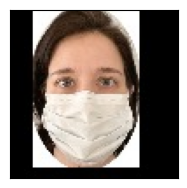

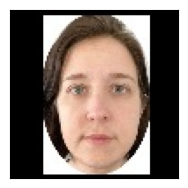

In [ ]:
!pip install face_recognition

import face_recognition
from matplotlib import pyplot as plt

# Load the known images
image_of_person_1 = face_recognition.load_image_file("./images/cropped-2.jpg")
image_of_person_2 = face_recognition.load_image_file("./images/cropped-3.jpg")
image_of_person_3 = face_recognition.load_image_file("./images/cropped.jpg")

# Get the face encoding of each person. This can fail if no one is found in the photo.
person_1_face_encoding = face_recognition.face_encodings(image_of_person_1)[0]
person_2_face_encoding = face_recognition.face_encodings(image_of_person_2)[0]
person_3_face_encoding = face_recognition.face_encodings(image_of_person_3)[0]

# Create a list of all known face encodings
known_face_encodings = [
    person_1_face_encoding,
    person_2_face_encoding,
    person_3_face_encoding
]

# Load the image we want to check
unknown_image = face_recognition.load_image_file("./images/cropped-4.jpg")

# Get face encodings for any people in the picture
unknown_face_encodings = face_recognition.face_encodings(unknown_image)

# There might be more than one person in the photo, so we need to loop over each face we found
for unknown_face_encoding in known_face_encodings:

    # Test if this unknown face encoding matches any of the three people we know
    results = face_recognition.compare_faces(known_face_encodings, unknown_face_encoding, tolerance=0.6)


    name = "Not found"

    if results[0]:
        name = "Dalyne"
    elif results[1]:
        name = "Lydia"
    elif results[2]:
        name = "Jeni"

print(f"Found {name} in the photo!")

fig=plt.figure()
ax1=fig.add_subplot(2,1,1)
ax1.imshow(unknown_image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
#plt.show()

fig= plt.figure()
ax2=fig.add_subplot(2,1,2)


if name=="Dalyne":
  ax2.imshow(image_of_person_1)

if name=="Lydia":
  ax2.imshow(image_of_person_2)

if name=="Jeni":
  ax2.imshow(image_of_person_3)
plt.xticks([]), plt.yticks([])
